<a href="https://colab.research.google.com/github/irfnrdh/Konvolusi/blob/master/Konvolusi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation  
from keras.layers import Conv2D, MaxPooling2D, Flatten 

Using TensorFlow backend.


In [0]:
batch_size = 32
num_clases = 10
epoch = 2
num_prediction = 20

In [3]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
print(xtrain.shape)

(50000, 32, 32, 3)


(<matplotlib.image.AxesImage at 0x7fd811ae8ac8>, array([9], dtype=uint8))

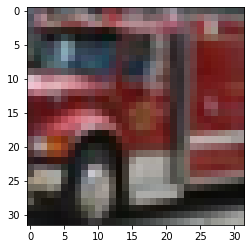

In [4]:
 plt.imshow(xtrain[88]), ytrain[88]

In [0]:
ytrain = keras.utils.to_categorical(ytrain,num_clases)
ytest = keras.utils.to_categorical(ytest,num_clases)

In [6]:
model= Sequential()
model.add(Conv2D(32,(3,3),padding='same', input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2 )))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same', input_shape=xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2 )))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))









Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [8]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 

In [0]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain = xtrain/255
xtest = xtest/255 

In [0]:
#xtrain[1]

In [11]:
model.fit(xtrain,ytrain, batch_size=32, epochs=2, validation_data=(xtest,ytest))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/2





50000/50000 [==============================] - 238s 5ms/step - loss: 1.8233 - acc: 0.3313 - val_loss: 1.5884 - val_acc: 0.4213
Epoch 2/2
50000/50000 [==============================] - 240s 5ms/step - loss: 1.5166 - acc: 0.4479 - val_loss: 1.3560 - val_acc: 0.5104


In [0]:
model.save('auhh.model')